<a href="https://colab.research.google.com/github/Laura-VFA/MachineLearning-21-22/blob/main/ML_Deliverable2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm *.*

!wget https://raw.githubusercontent.com/Laura-VFA/MachineLearning-21-22/main/Datasets/comments.csv


--2022-01-04 17:35:56--  https://raw.githubusercontent.com/Laura-VFA/MachineLearning-21-22/main/Datasets/comments.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1690905 (1.6M) [text/plain]
Saving to: ‘comments.csv’

comments.csv        100%[===================>]   1.61M  --.-KB/s    in 0.05s   

2022-01-04 17:35:56 (33.2 MB/s) - ‘comments.csv’ saved [1690905/1690905]



In [2]:
import pandas as pd
import nltk
nltk.download("popular")
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

!pip install stanza
import stanza

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

In [3]:
comments = pd.read_csv('comments.csv', sep=',')
comments.head()

,class,text
0,Auto,I have recently purchased a J30T with moderat...
1,Camera,I bought this product because I need instant ...
2,Auto,I have owned my Buick since 53000 km and I am...
3,Camera,This was my first Digital camera so I did qui...
4,Camera,Minolta DiMAGE 7Hi is in a digital SLR with 5...


# 1. Preprocessing

## 1.1 Remove useless data

In [4]:
import re
pattern = "!|\"|_|-|$|%|&|\/|\(|\)|=|ˆ|\*|¡|@" 
comments['text'] = [ re.sub(pattern, "", text) for text in comments['text']]
# TAMpoco rayarse, que no habia na de esto xd

## 1.2 Remove all capital letters

In [5]:
comments['text'] = [text.lower() for text in comments['text']]

In [6]:
comments['text']

0       i have recently purchased a j30t with moderat...
1       i bought this product because i need instant ...
2       i have owned my buick since 53000 km and i am...
3       this was my first digital camera so i did qui...
4       minolta dimage 7hi is in a digital slr with 5...
                             ...                        
595     recently our 12 year old nissan stanza decide...
596     i always do a lot of research before i buy an...
597     this car is an all around good buy  if you ar...
598     i waited to write this until i have had 4 mon...
599     i have been a montero owner since about 1985 ...
Name: text, Length: 600, dtype: object

## 1.3 Remove contractions

In [7]:
# Jesus  version ATENCION NO HE ESCRITO TODAS
#detección de contracciones
import re
patrones=[  # (patron/regex, no_contraido)
(r'that\s*?\'?\s*s','that is'),   
(r'won\s*\'?\s*t','will not'),   #won't
(r'can\s*\'?\s*t','cannot'),     #can't
(r'i\s*\'?\s*m','i am'),         # I'm
(r'ain\s*\'?\s*t', 'is not'),     # ain't
]

# TODO tomar decisión sobre las ambiguedades
for word in ['he', 'I', 'it', 'she', 'they', 'we', 'who', 'you']:
  patrones.append((r'\b' + word + r'\s*\'?\s*ll', word +' will'))

for word in ['are', 'could', 'did', 'do', 'does', 'had', 'have', 'should', 'was', 'were', 'is', 'would', 'must']:
  patrones.append((r'\b' + word + r'\s*n\'?\s*t', word +' not'))

for word in ['you', 'I', 'we', 'they']:
  patrones.append((r'\b' + word + r'\s*\'?\s*ve', word +' have'))

for word in ['that' , 'there', 'he', 'here', 'what', 'where', 'who', 'it', 'she']:
    patrones.append((r'\b' + word + r'\s*\'?\s*s', word +' is'))

for word in ['you', 'we', 'they',]:
    patrones.append((r'\b' + word + r'\s*\'?\s*re', word +' are'))

for word in ['she', 'they', 'he', 'we', 'I', 'you',]:
    patrones.append((r'\b' + word + r'\s*\'?\s*d', word +' would'))

for (patron, no_contraido) in patrones: 
  comments['text'] = [re.sub(patron, no_contraido, sentence) for sentence in comments['text']]

comments['text'][0]

' i have recently purchased a j30t with moderate miles  i shopped for a car that was looked after and paid more for it  as a former auto technician i know what to look for and what to expect yet every ti ame i drive this car i say to my self  dam that is a great car   and yes i truly do  the car affords a level of style and comfort that is beyond compare for the price  i had looked at a number of j30 s with some having covered 160k miles   i checked them to see where the problems show  they we are great other than just basic owner neglect the car is extremely quiet and smooth yet does not distance it iself from a mild degree of sportiness  performance is smooth yet i ampressive yet the power is we will handled by braking and suspension systems of si amilar refinement the appointments available with the car we are somewhat sparse yet the standard of quality and functionality we are apparent  the bose sound system for example has remarkable output and clarity without all the fancy dials 

## 1.4 Correct wrong words

In [8]:
#!pip install textblob
#from textblob import TextBlob


#comments['text'] = [TextBlob(comment).correct() for comment in comments['text']]

#comments['text'][0]

## 1.5 Remove or replace emoticons

In [9]:
pattern_camera = u'[\ud83d\udcf7\ud83c]'
pattern_love = u'[\u2764\ufe0f\U0001f496\u2665\ufe0f\U0001f495\U0001f493\u2661\u2665\ufe0f\U0001f618]'
pattern_car = u'[\U0001f697\U0001f698\U0001f6fb\U0001f3ce\U0001f699]'
pattern_smile = u'[\U0001f60a\U0001f600]'
comments['text'] = [ re.sub(pattern_camera, "camera", text) for text in comments['text'] ]
comments['text'] = [ re.sub(pattern_love, "love", text) for text in comments['text'] ]
comments['text'] = [ re.sub(pattern_car, "car", text) for text in comments['text'] ]
comments['text'] = [ re.sub(pattern_smile, "smile", text) for text in comments['text'] ]

pattern_emotic = u'[\U0001F300-\U0001F5FF\U0001F600-\U0001F64F\U0001F680-\U0001F6FA\u260E-\u26FF-\u2700-\u27BF]'
comments['text'] = [ re.sub(pattern_emotic, "", text) for text in comments['text'] ]


## 1.6 Remove repeated words

In [10]:
# Tokenizar words separadamente
from nltk.tokenize import word_tokenize

comments['text'] = [word_tokenize(sentence) for sentence in comments['text']]
comments['text']

0      [i, have, recently, purchased, a, j30t, with, ...
1      [i, bought, this, product, because, i, need, i...
2      [i, have, owned, my, buick, since, 53000, km, ...
3      [this, was, my, first, digital, camera, so, i,...
4      [minolta, di, amage, 7hi, is, in, a, digital, ...
                             ...                        
595    [recently, our, 12, year, old, nissan, stanza,...
596    [i, always, do, a, lot, of, research, before, ...
597    [this, car, is, an, all, around, good, buy, if...
598    [i, waited, to, write, this, until, i, have, h...
599    [i, have, been, a, montero, owner, since, abou...
Name: text, Length: 600, dtype: object

In [11]:
from itertools import groupby
comments['text'] = [comment[0] for comment in groupby(comments['text'])]

## 1.7 Lemmatize all terms



In [12]:
# VERSION QUE YA NO TARDA MUCHO :)
#stanza.download('en') 
#stNLP = stanza.Pipeline(processors='tokenize,mwt,pos,lemma', lang='en', use_gpu=True, tokenize_pretokenized=True)

#comments['text'] = [list(map(lambda x: x.text, sentence.tokens)) for sentence in stNLP(comments['text'].to_list()).sentences]
#comments['text']


In [13]:
lemmatizer = WordNetLemmatizer()# otra manera de 
comments['text'] = [[lemmatizer.lemmatize(word, pos = 'n') for word in sentence] for sentence in comments['text']]
comments['text'] = [[lemmatizer.lemmatize(word, pos = 'v') for word in sentence] for sentence in comments['text']]
comments['text'] = [[lemmatizer.lemmatize(word, pos = 'a') for word in sentence] for sentence in comments['text']]
comments['text'] = [[lemmatizer.lemmatize(word, pos = 'r') for word in sentence] for sentence in comments['text']]
comments['text'] = [[lemmatizer.lemmatize(word, pos = 's') for word in sentence] for sentence in comments['text']]
comments['text']
# PERO CLARO ORDEN ES IMPORTANTE???

0      [i, have, recently, purchase, a, j30t, with, m...
1      [i, buy, this, product, because, i, need, inst...
2      [i, have, own, my, buick, since, 53000, km, an...
3      [this, wa, my, first, digital, camera, so, i, ...
4      [minolta, di, amage, 7hi, be, in, a, digital, ...
                             ...                        
595    [recently, our, 12, year, old, nissan, stanza,...
596    [i, always, do, a, lot, of, research, before, ...
597    [this, car, be, an, all, around, good, buy, if...
598    [i, wait, to, write, this, until, i, have, hav...
599    [i, have, be, a, montero, owner, since, about,...
Name: text, Length: 600, dtype: object

In [14]:
comments

,class,text
0,Auto,"[i, have, recently, purchase, a, j30t, with, m..."
1,Camera,"[i, buy, this, product, because, i, need, inst..."
2,Auto,"[i, have, own, my, buick, since, 53000, km, an..."
3,Camera,"[this, wa, my, first, digital, camera, so, i, ..."
4,Camera,"[minolta, di, amage, 7hi, be, in, a, digital, ..."
...,...,...
595,Auto,"[recently, our, 12, year, old, nissan, stanza,..."
596,Camera,"[i, always, do, a, lot, of, research, before, ..."
597,Auto,"[this, car, be, an, all, around, good, buy, if..."
598,Auto,"[i, wait, to, write, this, until, i, have, hav..."


#2. Vectorization

In [15]:
comments['text'] = [' '.join(comment) for comment in comments['text'] ]
comments['text']

0      i have recently purchase a j30t with moderate ...
1      i buy this product because i need instant grat...
2      i have own my buick since 53000 km and i be no...
3      this wa my first digital camera so i do quite ...
4      minolta di amage 7hi be in a digital slr with ...
                             ...                        
595    recently our 12 year old nissan stanza decide ...
596    i always do a lot of research before i buy any...
597    this car be an all around good buy if you be i...
598    i wait to write this until i have have 4 month...
599    i have be a montero owner since about 1985 and...
Name: text, Length: 600, dtype: object

## 2.1 TFIDF

In [16]:

vectorizer_tfidf = TfidfVectorizer(use_idf=True, smooth_idf=True)
#ajustar y transformar
data_tfidf = vectorizer_tfidf.fit_transform(comments['text'])

In [17]:
#crear dataframe para visualizar

cv_tfidf=pd.DataFrame(data_tfidf.toarray(), columns=vectorizer_tfidf.get_feature_names())
print(cv_tfidf)

           00  000   01   02  024  ...      zoom  zoombrowser  zoomey  zx2  zx3
0    0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
1    0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
2    0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
3    0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
4    0.000000  0.0  0.0  0.0  0.0  ...  0.060858          0.0     0.0  0.0  0.0
..        ...  ...  ...  ...  ...  ...       ...          ...     ...  ...  ...
595  0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
596  0.066455  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
597  0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
598  0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0
599  0.000000  0.0  0.0  0.0  0.0  ...  0.000000          0.0     0.0  0.0  0.0

[600 rows x 10132 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2.2 TFIDF + N-grams

In [18]:
# Uso de n-gramas:  ngram_range=(min,max)
#vectorizer_ngrams = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1,3))
vectorizer_ngrams = TfidfVectorizer(ngram_range=(1,3))
data_ngrams = vectorizer_ngrams.fit_transform(comments['text'])
print("vocabulary: ", vectorizer_ngrams.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
cv_tfidf_ngrams=pd.DataFrame(data_ngrams.toarray(),columns=vectorizer_ngrams.get_feature_names())
print(cv_tfidf_ngrams)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


           00  00 00  00 00 from  ...  zx3  zx3 where  zx3 where laud
0    0.000000    0.0         0.0  ...  0.0        0.0             0.0
1    0.000000    0.0         0.0  ...  0.0        0.0             0.0
2    0.000000    0.0         0.0  ...  0.0        0.0             0.0
3    0.000000    0.0         0.0  ...  0.0        0.0             0.0
4    0.000000    0.0         0.0  ...  0.0        0.0             0.0
..        ...    ...         ...  ...  ...        ...             ...
595  0.000000    0.0         0.0  ...  0.0        0.0             0.0
596  0.025056    0.0         0.0  ...  0.0        0.0             0.0
597  0.000000    0.0         0.0  ...  0.0        0.0             0.0
598  0.000000    0.0         0.0  ...  0.0        0.0             0.0
599  0.000000    0.0         0.0  ...  0.0        0.0             0.0

[600 rows x 349861 columns]


## 2.3 TFIDF + N-grams + POS tagging

In [20]:
# tokenizar otra vez
from nltk.tokenize import word_tokenize

comments['text_token'] = [word_tokenize(sentence) for sentence in comments['text']]
comments['text_token']

0      [i, have, recently, purchase, a, j30t, with, m...
1      [i, buy, this, product, because, i, need, inst...
2      [i, have, own, my, buick, since, 53000, km, an...
3      [this, wa, my, first, digital, camera, so, i, ...
4      [minolta, di, amage, 7hi, be, in, a, digital, ...
                             ...                        
595    [recently, our, 12, year, old, nissan, stanza,...
596    [i, always, do, a, lot, of, research, before, ...
597    [this, car, be, an, all, around, good, buy, if...
598    [i, wait, to, write, this, until, i, have, hav...
599    [i, have, be, a, montero, owner, since, about,...
Name: text_token, Length: 600, dtype: object

In [21]:
from nltk.tokenize import word_tokenize
pos_comments = [[f'{word_pos[0]}_{word_pos[1]}' for word_pos in nltk.pos_tag(comment)] for comment in comments['text_token']]
#aux = pd.DataFrame()
#aux['col'] = pos_comments


In [22]:
comments['pos_comments'] = [' '.join(comment) for comment in pos_comments]

In [23]:
comments.head()

,class,text,text_token,pos_comments
0,Auto,i have recently purchase a j30t with moderate ...,"[i, have, recently, purchase, a, j30t, with, m...",i_NNS have_VBP recently_RB purchase_VB a_DT j3...
1,Camera,i buy this product because i need instant grat...,"[i, buy, this, product, because, i, need, inst...",i_JJ buy_VBP this_DT product_NN because_IN i_J...
2,Auto,i have own my buick since 53000 km and i be no...,"[i, have, own, my, buick, since, 53000, km, an...",i_NNS have_VBP own_JJ my_PRP$ buick_NN since_I...
3,Camera,this wa my first digital camera so i do quite ...,"[this, wa, my, first, digital, camera, so, i, ...",this_DT wa_NN my_PRP$ first_JJ digital_JJ came...
4,Camera,minolta di amage 7hi be in a digital slr with ...,"[minolta, di, amage, 7hi, be, in, a, digital, ...",minolta_NN di_NN amage_NN 7hi_CD be_VB in_IN a...


In [24]:
# vectorizaation

# Uso de n-gramas:  ngram_range=(min,max)
#vectorizer_ngrams = TfidfVectorizer(use_idf=True, smooth_idf=True, ngram_range=(1,3))
vectorizer_ngrams_pos = TfidfVectorizer(ngram_range=(1,3))
data_ngrams_pos = vectorizer_ngrams_pos.fit_transform(comments['pos_comments'])
print("vocabulary: ", vectorizer_ngrams_pos.vocabulary_)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
cv_tfidf_ngrams_pos=pd.DataFrame(data_ngrams_pos.toarray(),columns=vectorizer_ngrams_pos.get_feature_names())
print(cv_tfidf_ngrams_pos)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


     000_cd  000_cd 000_cd  ...  zx3_nn where_wrb  zx3_nn where_wrb i_nn
0       0.0            0.0  ...               0.0                    0.0
1       0.0            0.0  ...               0.0                    0.0
2       0.0            0.0  ...               0.0                    0.0
3       0.0            0.0  ...               0.0                    0.0
4       0.0            0.0  ...               0.0                    0.0
..      ...            ...  ...               ...                    ...
595     0.0            0.0  ...               0.0                    0.0
596     0.0            0.0  ...               0.0                    0.0
597     0.0            0.0  ...               0.0                    0.0
598     0.0            0.0  ...               0.0                    0.0
599     0.0            0.0  ...               0.0                    0.0

[600 rows x 388580 columns]


## 2.4 TFIDF + N-grams + POS tagging + other features

In [26]:
# Number of words

cv_tfidf_ngrams_pos['n_words'] = [len(comment) for comment in comments['text_token']]

In [27]:
cv_tfidf_ngrams_pos['n_words']

0       230
1       536
2       281
3       203
4      1002
       ... 
595     409
596     341
597     162
598     467
599     250
Name: n_words, Length: 600, dtype: int64

# 3. Feature selection

In [28]:
# selectKBest and removing 70%
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_regression

# Create feature and target variable for Classification problem
X_clf = cv_tfidf_ngrams_pos

y_clf = comments['class']

y_clf = np.where(y_clf == 'Auto', 0, y_clf)
y_clf = np.where(y_clf == 'Camera', 1, y_clf)
y_clf = y_clf.astype('int')

print(y_clf)

[0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 0
 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0
 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1
 0 1 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1
 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0
 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0
 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 0
 1 1 0 1 0 0 1 0 1 0 1 0 

In [29]:
# k is the number of features you want to select [here it's 2]
X_clf_new=SelectKBest(score_func=chi2,k=int(X_clf.shape[1] * .3)).fit_transform(X_clf,y_clf)

# Check the newly created variable for top two best features
print(X_clf_new.shape)

(600, 116574)


# 4. Classification algorithm

In [30]:
X_clf_new = pd.DataFrame(X_clf_new)

x_features = list(X_clf_new.columns)
len(x_features)

116574

In [31]:
from sklearn.model_selection import train_test_split
X = X_clf_new[x_features]
y = pd.Series(y_clf)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

## 4.2 SVM

In [32]:
from sklearn import model_selection, svm

SVM = svm.SVC(kernel='linear') # Definir el modelo SVM
SVM.fit(X_train,y_train) # Fase de entrenamiento del modelo

SVC(kernel='linear')

In [33]:
y_pred = SVM.predict(X_test) #uso

print(X_test)
print(y_pred)

       0       1       2       3       ...  116570  116571  116572  116573
110  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   757.0
419  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   226.0
565  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0    80.0
77   0.012894     0.0     0.0     0.0  ...     0.0     0.0     0.0   447.0
181  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   413.0
..        ...     ...     ...     ...  ...     ...     ...     ...     ...
54   0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   838.0
493  0.008264     0.0     0.0     0.0  ...     0.0     0.0     0.0   935.0
46   0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   312.0
93   0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   119.0
264  0.000000     0.0     0.0     0.0  ...     0.0     0.0     0.0   154.0

[180 rows x 116574 columns]
[1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 

In [34]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 0.0
MAPE: 0.0
MSE: 0.0
R^2: 1.0


In [35]:
from sklearn.metrics import confusion_matrix

print (y_test, y_pred)
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print (tn, fp, fn, tp)

110    1
419    0
565    1
77     0
181    1
      ..
54     1
493    0
46     0
93     0
264    0
Length: 180, dtype: int64 [1 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1
 0 0 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0]
77 0 0 103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


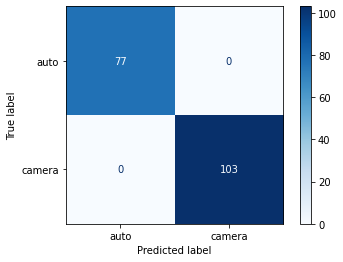

[[ 77   0]
 [  0 103]]


In [36]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#SVM ya debe estar entrenado
disp = plot_confusion_matrix(SVM, X_test, y_test, display_labels=["auto", "camera"],cmap=plt.cm.Blues) 
plt.show()
print(disp.confusion_matrix)

In [37]:
TP = disp.confusion_matrix[0][0]
FP = disp.confusion_matrix[0][1]
FN = disp.confusion_matrix[1][0]
TN = disp.confusion_matrix[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F_measure = 2 /(1/precision+1/recall)
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F-measure = " + str(F_measure))

Precision = 1.0
Recall = 1.0
F-measure = 1.0


## 4.3 RandomForests

No handles with labels found to put in legend.


Min Value : 0.05476190476190476 (12)


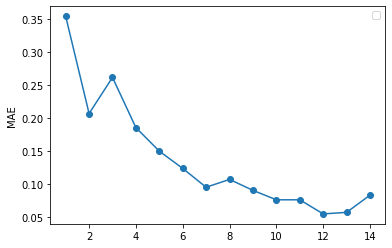

In [38]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

cv = KFold(n_splits = 3, shuffle = True)
total_scores = []
for i in range(1,15):
       fold_mae = []
       regr = RandomForestClassifier(n_estimators= 4, max_depth = i, random_state=0)
       for train_fold, test_fold in cv.split(X_train):
          # División train test aleatoria
          # train
          fx_train = X_train.iloc[train_fold]
          fy_train = y_train.iloc[train_fold]
          # test
          fx_test = X_train.iloc[test_fold]
          fy_test = y_train.iloc[test_fold]

          # entrenamiento y ejecución del modelo
          regr.fit(fx_train, fy_train)
          y_pred = regr.predict(fx_test)
          # evaluación del modelo
          mae = mean_absolute_error(fy_test, y_pred)
          fold_mae.append(mae)
       total_scores.append(sum(fold_mae)/len(fold_mae))
      
      
plt.plot(range(1,len(total_scores)+1), total_scores, 
           marker='o')
print ('Min Value : ' +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
plt.ylabel('MAE')      
plt.legend()
plt.show() 

In [48]:
from sklearn import tree
depth = 10
regr = RandomForestClassifier(n_estimators= 4, max_depth = depth, random_state=0)
regr.fit(X_train, y_train)
regr

RandomForestClassifier(max_depth=10, n_estimators=4, random_state=0)

In [49]:
y_pred = regr.predict(X_test)

In [50]:
from sklearn import metrics
print ("MAE:", metrics.mean_absolute_error(y_pred , y_test))
print ("MAPE:", metrics.mean_absolute_percentage_error(y_pred , y_test))
print ("MSE:", metrics.mean_squared_error(y_pred , y_test))
print ("R^2:", metrics.r2_score(y_pred , y_test))

MAE: 0.1
MAPE: 25019997929836.184
MSE: 0.1
R^2: 0.5536575285852046


In [42]:
from sklearn.metrics import confusion_matrix

print (y_test, y_pred)
tn, fp, fn, tp  = confusion_matrix(y_test, y_pred).ravel()
print (tn, fp, fn, tp)

110    1
419    0
565    1
77     0
181    1
      ..
54     1
493    0
46     0
93     0
264    0
Length: 180, dtype: int64 [1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1
 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1
 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0]
54 23 0 103


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


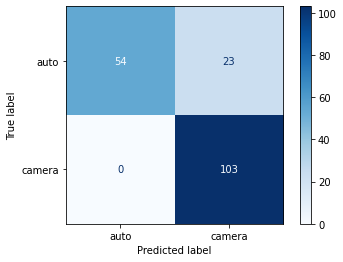

[[ 54  23]
 [  0 103]]


In [43]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

#SVM ya debe estar entrenado
disp = plot_confusion_matrix(regr, X_test, y_test, display_labels=["auto", "camera"],cmap=plt.cm.Blues) 
plt.show()
print(disp.confusion_matrix)

In [44]:
TP = disp.confusion_matrix[0][0]
FP = disp.confusion_matrix[0][1]
FN = disp.confusion_matrix[1][0]
TN = disp.confusion_matrix[1][1]
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F_measure = 2 /(1/precision+1/recall)
print("Precision = " + str(precision))
print("Recall = " + str(recall))
print("F-measure = " + str(F_measure))

Precision = 0.7012987012987013
Recall = 1.0
F-measure = 0.8244274809160307
